In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv(r'E:\notes\ML assignment\ML Project1_BMP\bank-marketing.csv')

In [85]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
df.isna().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

No missing values found

In [7]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.median()

age            39.0
salary      60000.0
balance       448.0
day            16.0
duration      180.0
campaign        2.0
pdays          -1.0
previous        0.0
dtype: float64

#### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [9]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [10]:
df.pdays.median()

-1.0

75% of the values seem to be the minimum, -1. The mean and median is also -1.

In [11]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

There are 36954 pdays records with -1 that can be ignored.

#### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [86]:
df.drop(df[df.pdays==-1].index,inplace=True)

In [87]:
df.shape

(8257, 19)

In [8]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,57564.006298,1556.880102,14.289209,260.118687,2.056195,224.577692,3.177546
std,11.425180,31791.407761,3060.593186,7.919176,235.208105,1.561169,115.344035,4.560820
min,18.000000,0.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,20000.000000,168.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,60000.000000,602.000000,14.000000,193.000000,2.000000,194.000000,2.000000
75%,48.000000,70000.000000,1743.000000,20.000000,324.000000,2.000000,327.000000,4.000000
max,93.000000,120000.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


In [88]:
df.pdays.median()

194.0

#### Plot a horizontal bar graph with the median values of balance for each education level value. 
#### Which group has the highest median?

<AxesSubplot:ylabel='education'>

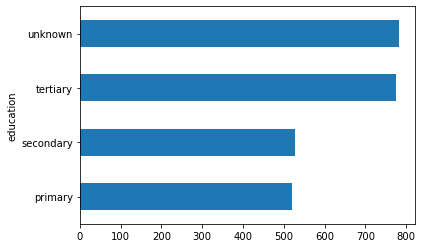

In [16]:
df.groupby(['education'])['balance'].median().plot.barh()

In [17]:
print("We have 'tertiary' and 'unknown' education level having the highest median values")
df.groupby(['education'])['balance'].median().sort_values(ascending=False)

We have 'tertiary' and 'unknown' education level having the highest median values


education
unknown      782
tertiary     775
secondary    527
primary      520
Name: balance, dtype: int64

#### Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

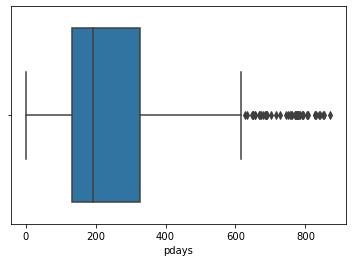

In [62]:
sns.boxplot(df.pdays)

We can see that the dataset has outliers for pdays column

## Bi-variate analysis 

### To identify the features that are directly associated with the target variable. 

Bivariate analysis:- is performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding the relationship between them. Ex:-Box plot, Violin plot.

#### Convert the response variable to a convenient form

In [10]:
df.replace({'response' : {"yes": 1, "no":0}}, inplace = True)

In [11]:
df.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

#### Make suitable plots for associations with numerical features and categorical features'

<AxesSubplot:>

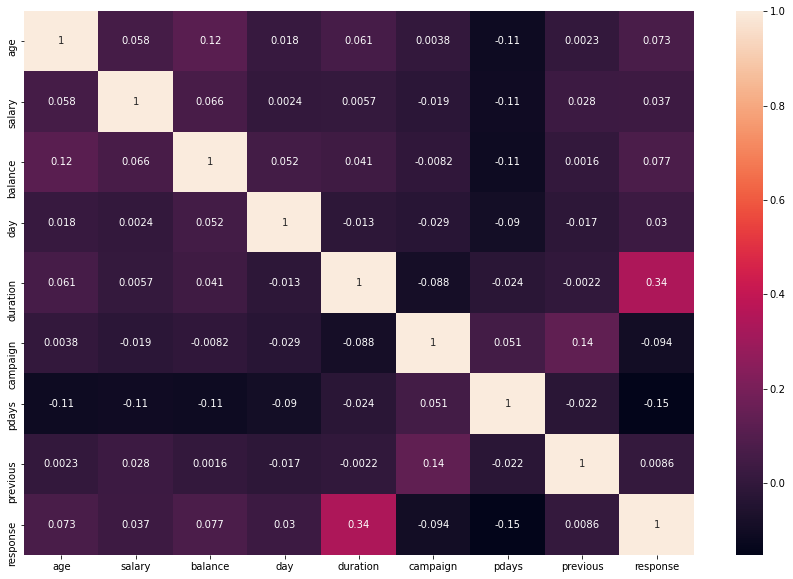

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [12]:
num_df = df.select_dtypes(include=np.number)

In [13]:
num_df.head(1)

,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,33,50000,882,21,39,1,151,3,0


In [14]:
cat_df = df.select_dtypes(include=np.object)

In [15]:
cat_df.head(1)

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,admin.,married,tertiary,yes,no,no,no,telephone,oct,failure


<Figure size 1080x720 with 0 Axes>

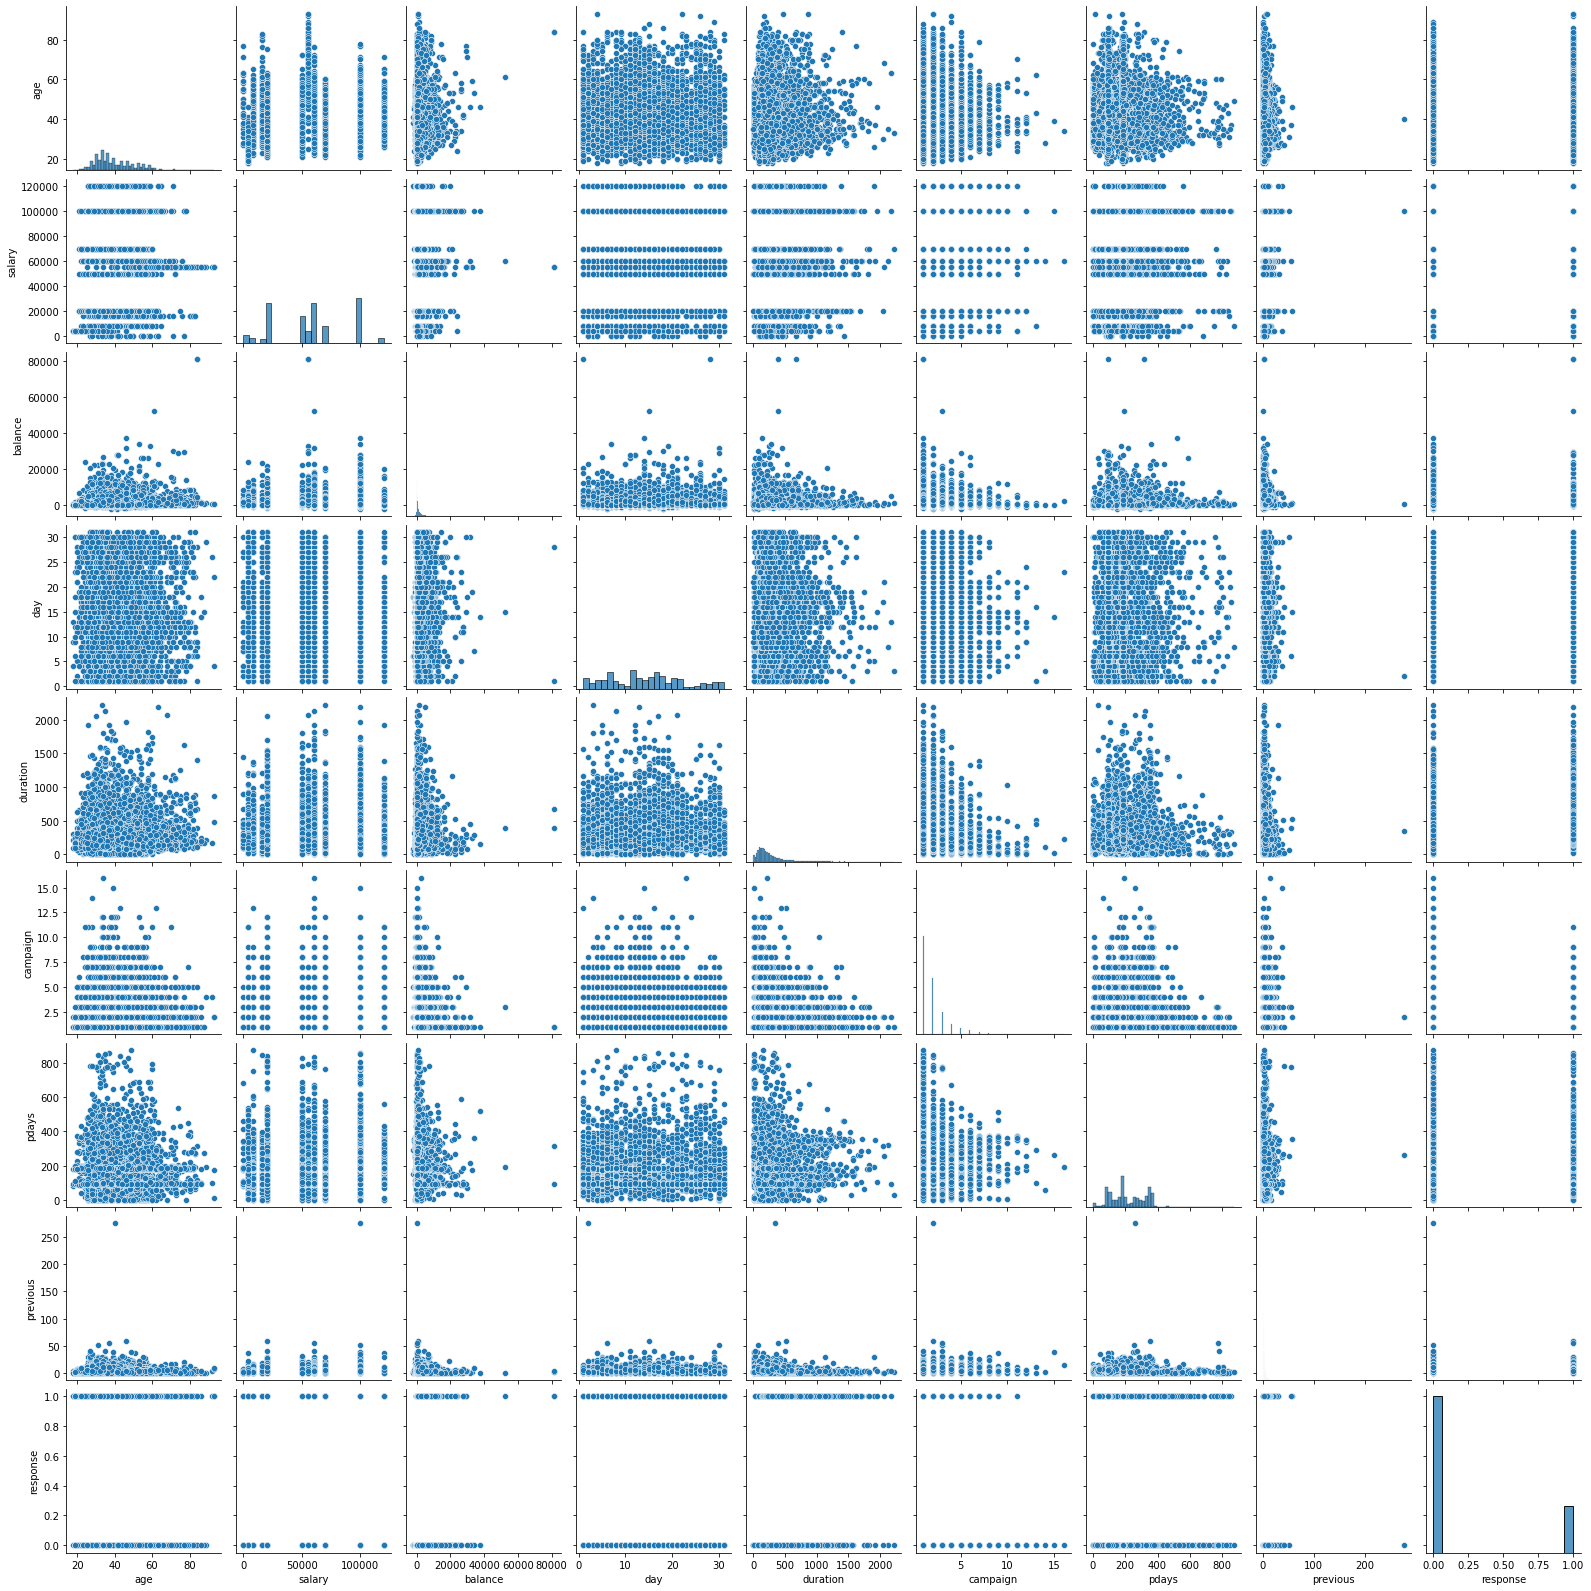

In [96]:
plt.figure(figsize=(15,10))
sns.pairplot(num_df)
plt.show()

In [16]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8257 entries, 24060 to 45210
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       8257 non-null   int64
 1   salary    8257 non-null   int64
 2   balance   8257 non-null   int64
 3   day       8257 non-null   int64
 4   duration  8257 non-null   int64
 5   campaign  8257 non-null   int64
 6   pdays     8257 non-null   int64
 7   previous  8257 non-null   int64
 8   response  8257 non-null   int64
dtypes: int64(9)
memory usage: 645.1 KB


In [176]:
numerical = df._get_numeric_data().columns.to_list()
numerical

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [177]:
categories = list(set(df.columns)- set(df._get_numeric_data().columns.to_list()))
categories

['marital',
 'job',
 'month',
 'targeted',
 'default',
 'contact',
 'response',
 'housing',
 'loan',
 'poutcome',
 'education']

#### Are the features about the previous campaign data useful?

As from the heatmap above we can see that the columns are not highly correlated.

#### Are pdays and poutcome associated with the target? 

In [17]:
set(cat_df.poutcome)

{'failure', 'other', 'success', 'unknown'}

Yes, poutcome and pdays are related, there is a high chance to get successful response again.

#### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

-1 values in pdays have already been handled

#### Before the predictive modeling part, make sure to perform –
#### - The necessary transformations for the categorical variables and the numeric variables
#### - Handle variables corresponding to the previous campaign
#### - Train test split

In [18]:
df.drop(df[df['poutcome']=='unknown'].index, inplace=True)
df.drop(df[df['contact']=='unknown'].index, inplace=True)
df.drop(df[df['job']=='unknown'].index, inplace=True)

In [19]:
df.shape

(8149, 19)

In [20]:
df.job = df.job.str.replace('admin.', 'admin') 

#### Logistic regression

In [1]:
from sklearn.preprocessing import LabelEncoder

In [89]:
data = df.copy(deep=True)

In [90]:
#cat_df = df.select_dtypes(include=np.object)

['marital',
 'job',
 'month',
 'targeted',
 'default',
 'contact',
 'response',
 'housing',
 'loan',
 'poutcome',
 'education']

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [92]:
data[categories] = df[categories].apply(LabelEncoder().fit_transform)

In [93]:
data.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0,1


In [94]:
y = data.pop('response')
x = data

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [97]:
x_train.shape

(5779, 18)

In [98]:
y_train.shape

(5779,)

## Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [100]:
sc.fit(x_train[numerical[:-1]])

StandardScaler()

In [101]:
x_train[numerical[:-1]] =sc.transform(x_train[numerical[:-1]])

In [102]:
x_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
37245,-1.394745,9,0.081407,2,2,0,0,0.125979,1,1,0,-0.169401,8,-0.831806,-0.675763,1.088812,1,0
43756,-0.347338,4,1.343597,1,2,1,0,0.544782,0,0,0,0.714372,8,0.127894,-0.035875,-0.195184,5,1
28223,1.223772,9,0.081407,1,1,1,0,-0.423168,1,0,0,1.850650,4,-0.755030,0.604012,-0.358915,3,0
45150,2.096611,4,1.343597,1,3,0,0,0.255998,0,0,0,-0.800667,9,0.396610,0.604012,-0.315828,13,2
37385,-0.085487,1,-1.180784,1,1,1,0,-0.471517,1,0,0,-0.169401,8,-0.605743,-0.035875,1.252543,1,0


In [103]:
x_test[numerical[:-1]] =sc.transform(x_test[numerical[:-1]])

In [104]:
x_test.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
26783,-0.260054,9,0.081407,1,2,1,0,-0.513332,0,0,0,0.714372,9,-0.042719,-0.035875,-1.065544,3,0
28508,-0.260054,9,0.081407,0,1,1,0,-0.338885,0,0,0,1.850650,4,-0.200536,0.604012,0.011634,7,0
43196,-1.045609,9,0.081407,2,2,0,0,0.300753,1,0,0,-1.431933,7,0.400876,-0.675763,-1.194805,5,0
24234,-0.260054,4,1.343597,1,2,1,0,-0.350972,0,0,0,0.335612,9,-0.490579,-0.675763,-1.039691,2,1
31204,-0.609190,4,1.343597,1,2,1,0,-0.173912,1,0,0,-1.558186,7,-0.780622,1.243900,-1.048309,7,0


#### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

In [106]:
lgr = LogisticRegression()

In [107]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [108]:
y_pred = lgr.predict(x_test)

In [164]:
def show_report(clf, y_true, y_pred): 
    print('Accuracy: ',accuracy_score(y_true, y_pred))
    print('--------------------------------------')
    print('\nClassification Report\n')
    print(classification_report(y_true, y_pred))

In [165]:
show_report(lgr, y_pred, y_test)

Accuracy:  0.8248587570621468
--------------------------------------

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2044
           1       0.50      0.66      0.57       434

    accuracy                           0.82      2478
   macro avg       0.71      0.76      0.73      2478
weighted avg       0.85      0.82      0.83      2478



In [133]:
#print("Accuracy Score", accuracy_score(y_test,y_pred))

In [134]:
#print("Precision Score", precision_score(y_test,y_pred))

In [135]:
#print("Classification Report\n", classification_report(y_test,y_pred))

#### RFE

In [112]:
from sklearn.feature_selection import RFE
rfe = RFE(lgr, 15)

In [113]:
rfe = rfe.fit(x_train, y_train)

In [114]:
rfe.ranking_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1])

In [115]:
cols = x_train.columns[rfe.support_]
lgr.fit(x_train[cols],y_train)
y_pred2 = lgr.predict(x_train[cols])

In [166]:
show_report(lgr, y_pred, y_test)

Accuracy:  0.8248587570621468
--------------------------------------

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2044
           1       0.50      0.66      0.57       434

    accuracy                           0.82      2478
   macro avg       0.71      0.76      0.73      2478
weighted avg       0.85      0.82      0.83      2478



#### VIF

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif = pd.DataFrame()
vif['features'] = x_train[cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i).round(2) for i in range(x_train[cols].shape[1])]
vif = vif.sort_values(by='VIF', ascending=True)
vif

,features,VIF
5,default,1.01
10,day,1.01
12,campaign,1.02
11,duration,1.03
6,balance,1.04
9,contact,1.15
8,loan,1.20
13,pdays,1.20
1,salary,1.22
0,age,1.28


#### p-value

In [121]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
a = sm.add_constant(x_train[cols])
b = y_train

In [122]:
model = sm.OLS(b, a)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:25:06   Log-Likelihood:                -2065.6
No. Observations:                5779   AIC:                             4163.
Df Residuals:                    5763   BIC:                             4270.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1920      0.027      7.139      0.0

In [123]:
pvals = []
for i in cols:
    a = round(results.pvalues[i],3)
    pvals.append(a)

a = zip(cols, pvals)
df_pvals = pd.DataFrame(a, columns=['Column', 'pvalues']).sort_values('pvalues')
df_pvals

,Column,pvalues
3,education,0.000
7,housing,0.000
8,loan,0.000
11,duration,0.000
12,campaign,0.000
14,poutcome,0.000
0,age,0.005
9,contact,0.008
2,marital,0.029
6,balance,0.113


In [125]:
imp_features = df_pvals.nlargest(8, 'pvalues')['Column'].to_list()
imp_features

['default',
 'targeted',
 'salary',
 'pdays',
 'day',
 'balance',
 'marital',
 'contact']

In [127]:
lgr.fit(x_train[final_features], y_train)
y_pred3 = lgr.predict(x_test[final_features])

In [167]:
show_report(lgr, y_pred3, y_test)

Accuracy:  0.7703793381759484
--------------------------------------

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      2473
           1       0.01      0.80      0.01         5

    accuracy                           0.77      2478
   macro avg       0.50      0.79      0.44      2478
weighted avg       1.00      0.77      0.87      2478



In [143]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lgr)
smf.fit(x_train,y_train)
features = smf.get_support()
feature_name = x_train.columns[features]
print('Most Important features are: ',feature_name)

Most Important features are:  Index(['default', 'housing', 'loan', 'duration', 'poutcome'], dtype='object')


#### Random Forest 

In [147]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=48,max_depth=5)
rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=5, n_estimators=48)

In [148]:
y_pred_rfc = rfc.predict(x_test)

In [168]:
show_report(rfc, y_pred_rfc, y_test)

Accuracy:  0.8264729620661824
--------------------------------------

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      2174
           1       0.39      0.73      0.51       304

    accuracy                           0.83      2478
   macro avg       0.67      0.79      0.70      2478
weighted avg       0.89      0.83      0.85      2478



#### Most important features in the model

In [155]:
imps=clf2.feature_importances_
feature_importances=pd.Series(imps, index=x_train.columns).sort_values(ascending=False)
selected_features = feature_importances.index.to_list()[:5]
print(selected_features)

['poutcome', 'duration', 'housing', 'pdays', 'month']


#### Comparing Logistic Regression and Random Forest

In [159]:
print('Logistic Regression\n')
show_report(lgr , y_pred, y_test)
print('**********************************************************************************')
print('\nRandom Forest Classifier\n')
show_report(rfc, y_pred_rfc, y_test)

Logistic Regression

Accuracy:  0.8248587570621468
--------------------------------------
Precision:  0.5
--------------------------------------

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2044
           1       0.50      0.66      0.57       434

    accuracy                           0.82      2478
   macro avg       0.71      0.76      0.73      2478
weighted avg       0.85      0.82      0.83      2478

--------------------------------------
**********************************************************************************

Random Forest Classifier

Accuracy:  0.8264729620661824
--------------------------------------
Precision:  0.38986013986013984
--------------------------------------

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      2174
           1       0.39      0.73      0.51       304

    accuracy               

Accuracy of Random Forest seems better